Reference: Evaluation of Gaussian Molecular Integrals  III. Nuclear-Electron Attraction Integrals

In [ ]:
abscissa[n_, i_] := 
  (n + 1 - 2 * i) / (n + 1) + (2 / Pi) (1 + (2 / 3) Sin[i Pi / (n + 1)]^2) Cos[i Pi / (n + 1)] Sin[i Pi / (n + 1)]

omega[n_, i_] := (16 / (3 (n + 1))) Sin[i Pi / (n + 1)]^4;

IntChebyshev[eps_, M_, F_] := 
  Module[{c0 = Cos[Pi / 6], s0 = Sin[Pi / 6], c1, s1, q, p, chp, j, c, s, xp, err = 10., n = 3}, 
    c1 = s0;
    s1 = c0;
    q = (F /. x -> abscissa[2, 1]) + (F /. x -> -abscissa[2, 1]) * omega[2, 1];
    p = F /. x -> 0.0;
    chp = q + p;
    j = 0;
    While[err > eps && ((2 n (1 - j) + j * 4 * n / 3 - 1) <= M),

      j = 1 - j;
      c1 = j * c1 + (1 - j) * c0;
      s1 = j * s1 + (1 - j) * s0;
      c0 = j * c0 + (1 - j) * Sqrt[(1 + c0) * 0.5];
      s0 = j * s0 + (1 - j) * s0 / (c0 + c0);
      c = c0;
      s = s0;
      Do[
        xp = 1 + 2 / (3 * Pi) * s * c * (3 + 2 s^2) - i / n;
        If[Ceiling[(3 * (i + j + j)) / 3] > i + j,
          chp = chp + (((F /. x -> -xp) + (F /. x -> xp)) * s^4)
        ]; (* end of If *)

        xp = s;
        s = s * c1 + c * s1;
        c = c * c1 - xp * s1,
        {i, 1, n - 1, 2}
      ]; (* End of Do Loop *)

      n = (1 + j) * n;
      p = p + (1 - j) * (chp - q);
      err = 16 * Abs[(1 - j) * (q - 3 * p / 2) + j * (chp - 2 * q)] / (3 n);
      q = (1 - j) * q + j * chp
    ]; (* end of While *)

    SetPrecision[16 * q / (3 n), 16]
  ]

In [ ]:
Nea[alpha_, beta_, RA_, RB_, RR_, LA_, LB_] := Module[
    {eta, EAB},
    Do[
        
        (* Initial Conditions for eta *)

      eta[i, 0, 0] = 1;
      eta[i, 1, 0] = 
      -(RA[[i]] - ((alpha * RA[[i]] + beta * RB[[i]]) / 
        (alpha + beta))) + 
        (t^2) * 
        ((alpha * RA[[i]] + beta * RB[[i]]) / (alpha + beta) - 
        RR[[i]]);
    (* Recurrence Index *)

      eta[i_, a_, 0] := 
      -(RA[[i]] - ( (alpha * RA[[i]] + beta * RB[[i]]) / 
      (alpha + beta)) +
      (t^2) *
      (( (alpha * RA[[i]] + beta * RB[[i]]) / (alpha + beta) )- 
        RR[[i]])) * eta[i, a - 1, 0] + 
    ((a - 1) / (2 * (alpha + beta))) * (1 - t^2) * eta[i, a - 2, 0];

    (* Transfer Equation *)

    eta[i_, a_, b_] := 
      eta[i, a + 1, b - 1] + (RA[[i]] - RB[[i]]) * eta[i, a, b - 1];,
      {i, 1, 3}];

    (* Exponential Overlap *)

    EAB = Exp[-(alpha * beta / (alpha + beta)) * 
        (RA - RB).(RA - RB)];

    (* N-e Attraction Energy Integral *)

    EAB * (2 * Pi / (alpha + beta)) * 

        (* Numerical integration using Pérez-Jordá method *)
        (* 10^-10 tolerance, 50000 maximum points allowed *)
        (* Equation (23) *)

    (IntChebyshev[10^-10, 50000, 
        1/2 * 
            Exp[-((alpha + beta) * (t^2) * 
            ((((alpha * RA + beta * RB) / (alpha + beta)) - RR).
                (((alpha * RA + beta * RB) / (alpha + beta)) - 
                RR))) ] * eta[1, LA[[1]], LB[[1]]] * 
            eta[2, LA[[2]], LB[[2]]] * 
            eta[3, LA[[3]], LB[[3]]] /. t -> (x + 1) / 2])
    ]

In [ ]:
(* Cartesian coordinates of the atoms in the water molecule in atomic units *)
R = {
  {0., 1.43233673, -0.96104039},  (* H1 *)
  {0., -1.43233673, -0.96104039}, (* H2 *)
  {0., 0., 0.24026010}            (* O *)
};

(* STO-3G basis set: Unnormalized primitive contraction coefficients and orbital exponents *)
PrimCoeff = {
  {0.1543289673, 0.5353281423, 0.4446345422},
  {0.1543289673, 0.5353281423, 0.4446345422},
  {0.1543289673, 0.5353281423, 0.4446345422},
  {-0.09996722919, 0.3995128261, 0.7001154689},
  {0.155916275, 0.6076837186, 0.3919573931},
  {0.155916275, 0.6076837186, 0.3919573931},
  {0.155916275, 0.6076837186, 0.3919573931}
};

OrbCoeff = {
  {3.425250914, 0.6239137298, 0.168855404},
  {3.425250914, 0.6239137298, 0.168855404},
  {130.7093214, 23.80886605, 6.443608313},
  {5.033151319, 1.169596125, 0.38038896},
  {5.033151319, 1.169596125, 0.38038896},
  {5.033151319, 1.169596125, 0.38038896},
  {5.033151319, 1.169596125, 0.38038896}
};

In [ ]:
(* Basis function origins and Cartesian angular values of the orbitals *)
FCenter = {R[[1]], R[[2]], R[[3]], R[[3]], R[[3]], R[[3]], R[[3]]};

CartAng = {
  {0, 0, 0}, {0, 0, 0}, {0, 0, 0}, {0, 0, 0},
  {1, 0, 0}, {0, 1, 0}, {0, 0, 1}
};

(* Atomic numbers for hydrogen and oxygen *)
Z = {1, 1, 8};

General::munfl: Exp[-902.903] is too small to represent as a normalized machine number; precision may be lost.

General::munfl: Exp[-913.214] is too small to represent as a normalized machine number; precision may be lost.

General::munfl: Exp[-845.833] is too small to represent as a normalized machine number; precision may be lost.

General::stop: Further output of General::munfl will be suppressed during this calculation.

-5.71691     -1.56861     -1.61524     -3.65729     0            -3.26716     2.66744

-1.56861     -5.71691     -1.61524     -3.65729     0            3.26716      2.66744

-1.61524     -1.61524     -61.6912     -7.43668     0            0            -0.0186812

-3.65729     -3.65729     -7.43668     -10.1107     0            0            -0.222158

0            0            0            0            -9.96004     0            0

-3.26716     3.26716      0            0            0            -9.82383     0

2.66744      2.66744      -0.0186812   -0.222158    0            0            -9.86423
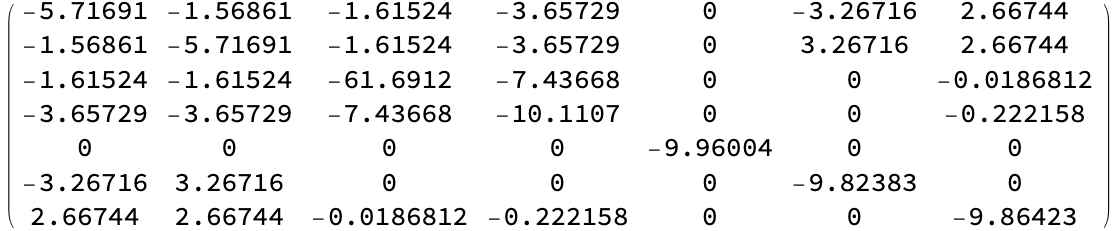

In [ ]:
NormCoeff[a_, {ax_, ay_, az_}] := 
  (2 a / Pi)^(3/4) (4 a)^( (ax + ay + az) / 2 ) / 
  Sqrt[(2 ax - 1)!! * (2 ay - 1)!! * (2 az - 1)!!];

Table[
  Sum[
    (-Z[[Nuc]]) * Sum[
      NormCoeff[OrbCoeff[[p, i]], CartAng[[p]]] *
      NormCoeff[OrbCoeff[[q, j]], CartAng[[q]]] *
      PrimCoeff[[p, i]] * PrimCoeff[[q, j]] *
      Nea[
        OrbCoeff[[p, i]], OrbCoeff[[q, j]],
        FCenter[[p]], FCenter[[q]], R[[Nuc]],
        CartAng[[p]], CartAng[[q]]
      ],
      {i, 3}, {j, 3}
    ],
    {Nuc, 1, 3}
  ],
  {p, 1, 7}, {q, 1, 7}
] // MatrixForm // Chop